In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(r"ToyotaCorolla - MLR.csv")
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.shape

(1436, 11)

In [3]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [4]:
df.isnull().sum()


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

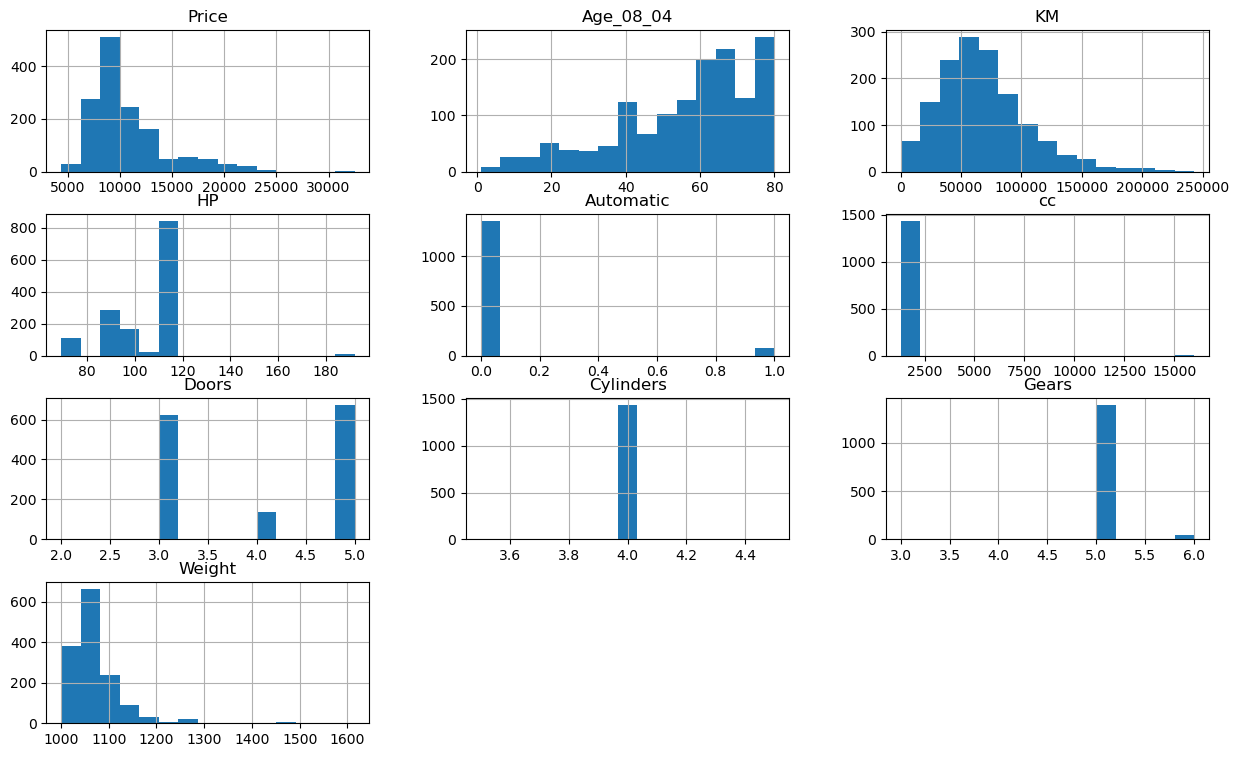

In [5]:
#data visualization
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
df[numerical_columns].hist(bins=15,figsize=(15,9))
plt.show()

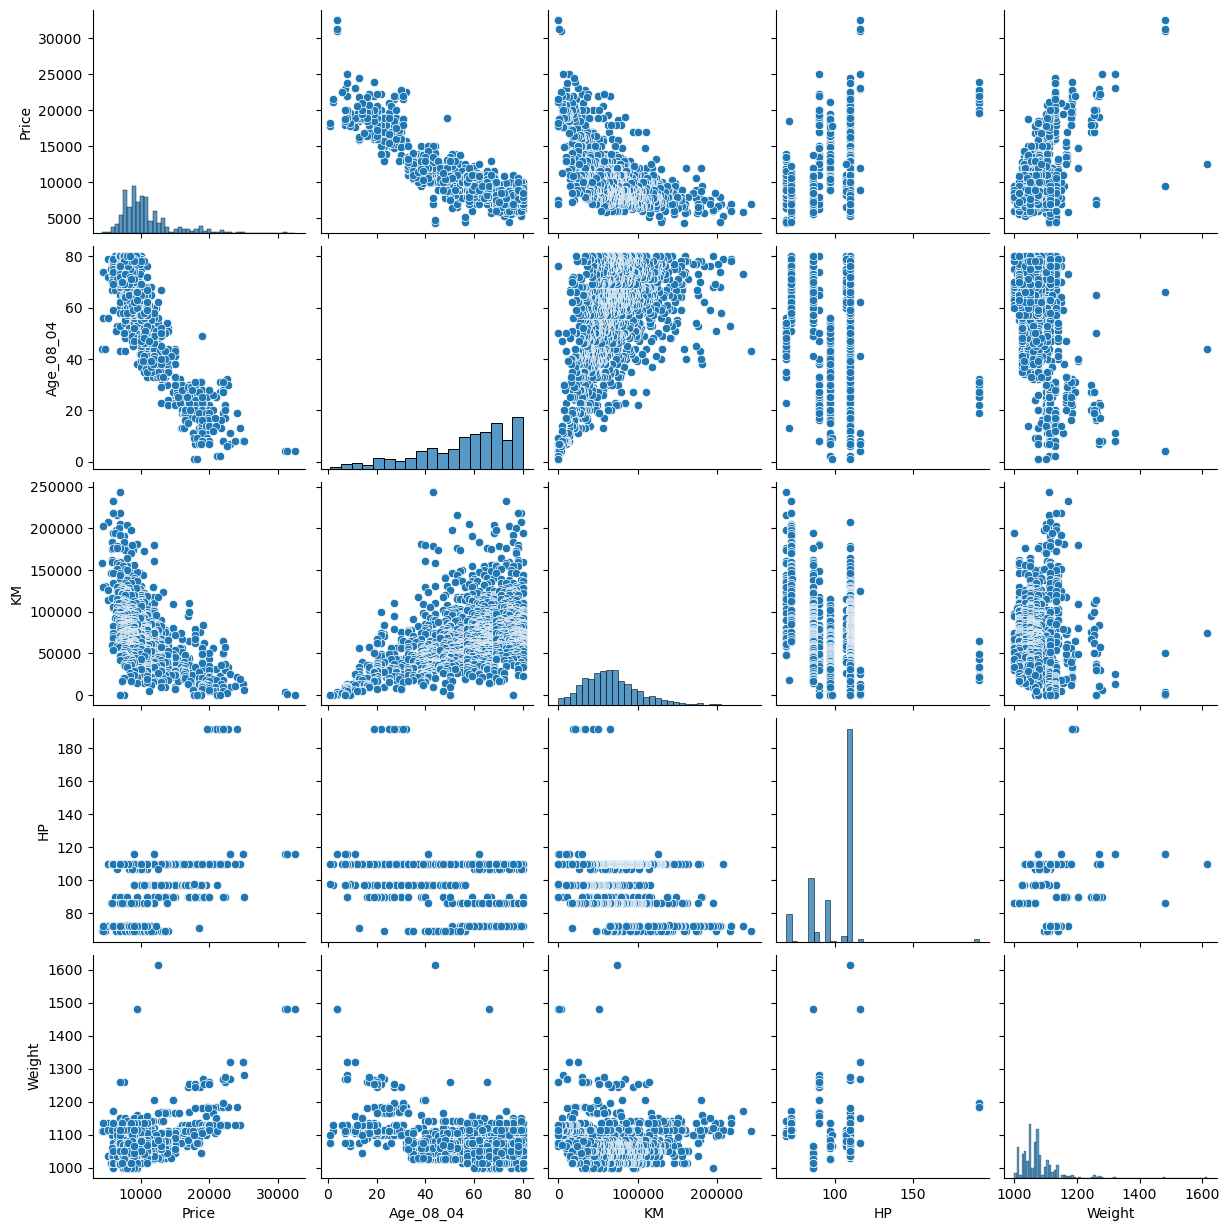

In [6]:
# Visualize the relationships between variables
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'Weight']])
plt.show()


In [7]:
#summary statistics of the variable
summary_stats=df.describe()
print(summary_stats)


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [8]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


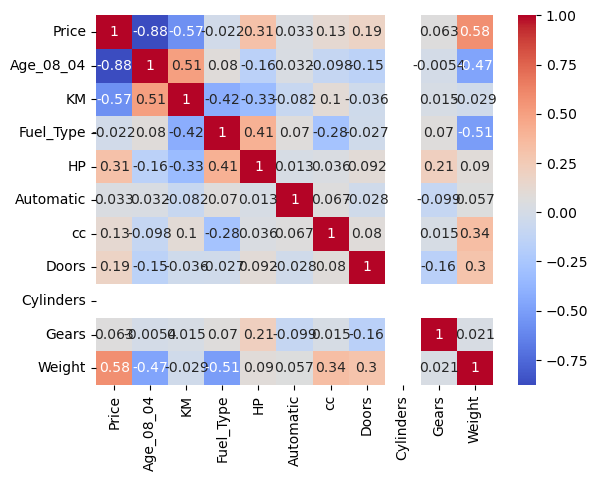

In [9]:
#correlation heatmap
plt.figure(figure=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [10]:
# Separate features and target variable
X = df.drop(columns=['Price'])#independent variable
y = df['Price']#dependent variable



In [44]:
X

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [46]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [11]:
# Split the dataset into training and testing sets into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations
#X_train_transformed = preprocessor.fit_transform(X_train)
#X_test_transformed = preprocessor.transform(X_test)


In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

In [18]:
# 3.Build a multiple linear regression model using the training dataset. 
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [22]:
y_pred=model.predict(x_test)
y_pred
#predicting test set


array([11176.88365168,  8969.1938439 ,  9390.64915234,  8959.94241825,
       10094.01821299,  7913.49724682,  8711.31021617,  8272.4299364 ,
       14099.45852336, 13127.72764197,  9501.54591049,  9334.42692059,
       12951.90705321, 12972.83756342,  9790.64330039,  8265.25917943,
       12224.51772432, 17544.47058521,  7438.66374444,  9163.16957768,
       12709.45670685, 17800.43098183,  7897.53078219, 10411.70134794,
        7510.34559491, 16023.02765902, 10009.09251399,  7384.1061756 ,
       15660.75614251, 14492.87243282,  8163.60889331,  9721.89850261,
        8517.21387413, 10117.4453602 , 10270.74638079,  8061.1526819 ,
        8826.78990137,  9983.54452121, 16369.15247944,  9602.28333034,
        9855.55511678,  9524.19414468,  7887.04214664,  5591.09915884,
        6813.79842794, 17188.49868866,  9454.68153269, 10708.19290246,
        8717.9298301 , 13466.54920006, 12986.62729073,  6339.25682125,
       14945.71922901, 16286.20925466,  6104.08639256,  7772.71794599,
      

In [26]:
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:2096851.1400177048


In [30]:
#to find coefficients of the model
coefficients=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coefficients)

            Coefficient
Age_08_04 -1.214362e+02
KM        -1.693560e-02
Fuel_Type  8.620564e+02
HP         2.065828e+01
Automatic  2.451969e+02
cc        -7.351539e-02
Doors     -3.627965e+01
Cylinders  2.273737e-13
Gears      5.302820e+02
Weight     2.351064e+01


In [32]:
#we also do by using statsmodels to get detailed summary
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
model_sm=sm.OLS(y_train,x_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:59:32   Log-Likelihood:                -9866.5
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -121.4362      2.884    -42.104      0.0

In [40]:
#to build 3 different models
#Model 1: All features
x_train_model1 = x_train  # All features
model1 = LinearRegression().fit(x_train_model1,y_train)
model1

LinearRegression()

In [50]:
#Model 2: Select a subset of features
x_train_model2 = x_train[['KM', 'Weight']]  # Replace with actual feature names
model2 = LinearRegression().fit(x_train_model2,y_train)
model2

LinearRegression()

In [60]:
from sklearn.preprocessing import PolynomialFeatures

# Model 3: Polynomial features or interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)
x_train_model3 = poly.fit_transform(x_train)

model3 = LinearRegression().fit(x_train_model3,y_train)
model3

LinearRegression()

In [70]:
#4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

#to Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 992.8982858371423
Mean Squared Error (MSE): 2096851.1400177048
Root Mean Squared Error (RMSE): 1448.0508071258082
R-squared (R2): 0.8428476112018002


C:\Users\nazme\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
from sklearn.linear_model import Lasso, Ridge

#5.Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test,y_pred_lasso)
print(f"Lasso Regression - MSE: {lasso_mse}, R^2: {lasso_r2}")

#5.Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
ridge_mse = mean_squared_error(y_test,y_pred_ridge)
ridge_r2 = r2_score(y_test,y_pred_ridge)
print(f"Ridge Regression - MSE: {ridge_mse}, R^2: {ridge_r2}")


Lasso Regression - MSE: 2096722.1822062011, R^2: 0.8428572761836127
Ridge Regression - MSE: 2096694.72234602, R^2: 0.842859334213647
